## SIMULAÇÃO DA EQ. DE DIFUSÃO-CONVECÇÃO-REAÇÃO


In [54]:
import numpy as np
from numpy import exp, sin
import matplotlib.pyplot as plt

#https://www.youtube.com/watch?v=NLuCx2SrxHw&t=787s

#### Funciona bem para o seguintes parâmetros
L = 1   # tamanho do espaço

T = 10  # tempo total

NN = 40  # número de passo entre os estados / para a discretização dos intervalos

##### Parâmetros
a = 0.010   # cte. de decaimento / afunila a curva quanto maior for o valor 

D0 = 1     # coef. básico da difusão 

k1 = L*0.7   # coef. das funções periódicas / subperiódicas   
k2 = L*0.3           
r1 = 0.5             
r2 = 1           

N0 = 1     # tamanho inicial da população      \\

In [55]:
# Para testar outros valores 
L = 1
T = 100
NN = 40

#parametros
a = 0.010   
D0 = 1
k1 = L*0.4
k2 = L*0.3
r1 = 0.5
r2 = 1.0
N0 = 10

#malha/mesh
x = np.linspace(-L, L, NN)    # mesh points in space
t = np.linspace(1E-308, T, NN)    # mesh points in time
n = len(x)
m = len(t)
h = 0.7  #define os espaçamentos dx
k = 0.24  #define os espaçamentos dt  ##para h=0.6 e k até 0.255 , rho se comporta bem, em 0.26.. já começa a colapçar

#funções conhecidas do problema
K_per = (k1 + k2*sin(t))  #capacidade suporte periódica / subamortecida
K_sub = (k1 + k2*sin(1/t))

r_per = (r1 + r2*sin(t))   #taxa de crescimento
r_sub = (r1 + r2*sin(1/t)) 

D_per = D0*exp(-a * K_per * x**2)*np.ones((n,m) )   #difusividade
D_sub = D0*exp(-a * K_sub * x**2)*np.ones((n,m) )

CI = N0/(L+abs(x))   # condição inicial
CC = [0.1*N0/t, N0/t]  #Condições de contorno / alterar os valores altera a forma da interação nas fronteiras

rho = np.zeros( (n, m) )   #define a matriz rho/densodade populacional


rho[0,:] = CC[0]          #coloca as CC nos extremos 
rho[-1,:] = CC[1]
rho[:,0] = CI              #coloca as condições iniciais
#rho.round(3)      #se tirar o "#" vai poder visualizar os valores da matriz rho arredondados em 3 casas decimais..
#rho[0:1,0:]   #retorna toda a coluna 1
rho2 = rho

k/h**2      #para verificar as estabilidade, esse fator tem que sem inferior a 0.5

C:\Users\shrod\AppData\Local\Temp\ipykernel_11552\3601970978.py:34: RuntimeWarning: overflow encountered in divide
  CC = [0.1*N0/t, N0/t]  #Condições de contorno / alterar os valores altera a forma da interação nas fronteiras


0.489795918367347

### Equação I - DCR periódica

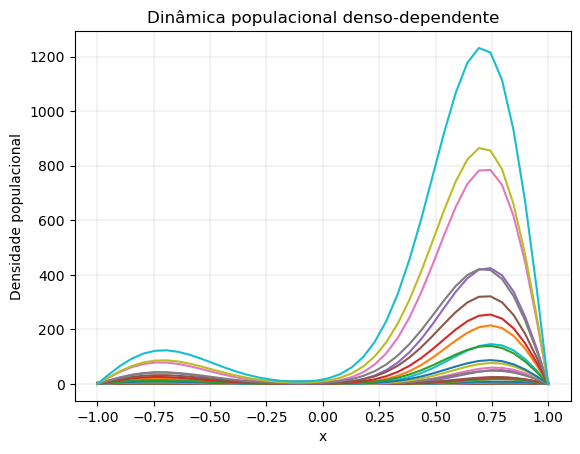

In [56]:
u = 1
for j in range(1,m-1):    #varre as coluna
    for i in range(1,n-1):  #varre as linhas
        alfa = k/(2*h**2)*( D_per[i,j] +  D_per[i+1,j] )
        beta = k/(2*h**2)*(2* D_per[i,j] +  D_per[i+1,j] +  D_per[i-1,j]) 
        gama = k/(2*h**2)*(  D_per[i,j] +  D_per[i-1,j] )
        rho[i,j+1] =  alfa*rho[i+1,j] - beta*rho[i,j] + gama*rho[i-1,j] + rho[i,j] + r_per[j]*(rho[i,j])**u
        #print(alfa, beta, gama)

#rho.round(3)

plt.plot(x, rho)
plt.title('Dinâmica populacional denso-dependente')
plt.xlabel('x')
plt.ylabel('Densidade populacional')
plt.grid(linewidth=0.2)
plt.show()

### Equação II - DCR subamortecida

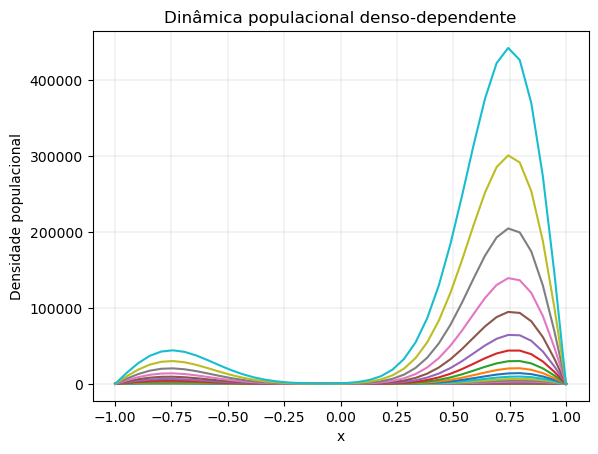

In [57]:
u = 1
for j in range(1,m-1):    #varre as coluna
    for i in range(1,n-1):  #varre as linhas
        alfa2 = k/(2*h**2)*( D_sub[i,j] +  D_sub[i+1,j] )
        beta2 = k/(2*h**2)*(2* D_sub[i,j] +  D_sub[i+1,j] +  D_sub[i-1,j]) 
        gama2 = k/(2*h**2)*(  D_sub[i,j] +  D_sub[i-1,j] )
        rho2[i,j+1] =  alfa2*rho2[i+1,j] - beta2*rho2[i,j] + gama2*rho2[i-1,j] + rho2[i,j] + r_sub[j]*(rho2[i,j])**u
        #print(alfa, beta, gama)

#rho.round(3)

plt.plot(x, rho2)
plt.title('Dinâmica populacional denso-dependente')
plt.xlabel('x')
plt.ylabel('Densidade populacional')
plt.grid(linewidth=0.2)

plt.show()